1.252784742257823
/home/qpitto/Tests_KAIN/test_water/run/orbitals/phi_p_scf_idx_0_re
/home/qpitto/Tests_KAIN/test_water/run/orbitals/phi_p_scf_idx_1_re
/home/qpitto/Tests_KAIN/test_water/run/orbitals/phi_p_scf_idx_2_re
/home/qpitto/Tests_KAIN/test_water/run/orbitals/phi_p_scf_idx_3_re
/home/qpitto/Tests_KAIN/test_water/run/orbitals/phi_p_scf_idx_4_re
Start perturbation
Contructor passed


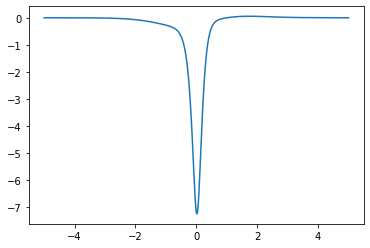

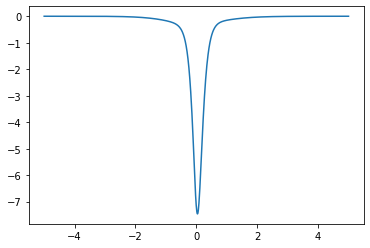

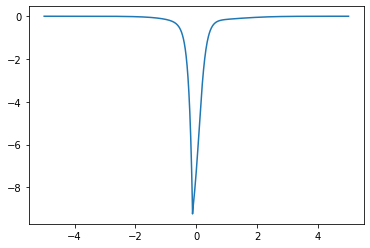

mu_0 =  0.21883414414959806


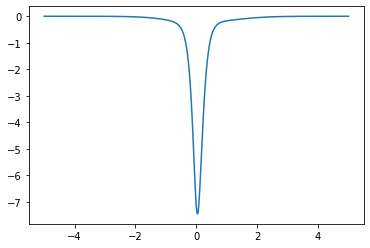

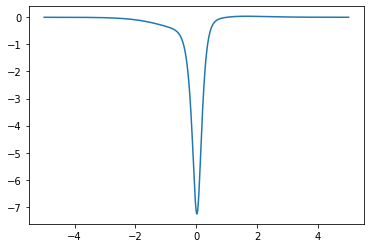

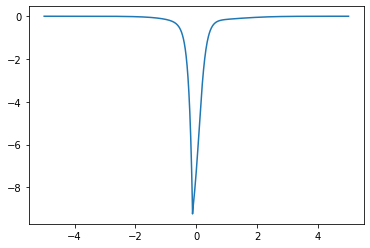

mu_1 =  0.16462693589572913


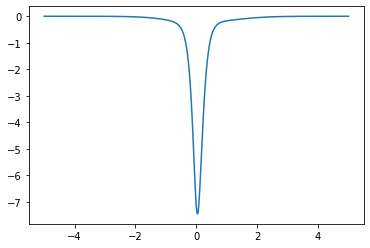

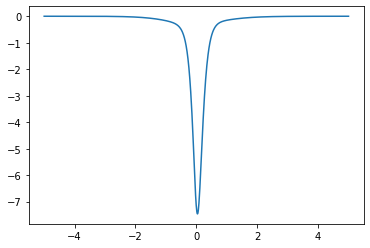

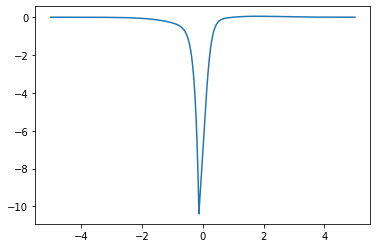

mu_2 =  0.1799009027243193


In [1]:
from vampyr import vampyr3d as vp
import numpy as np
import matplotlib.pyplot as plt
# from copy import deepcopy

# import KAIN
# import utils
from scfsolv import scfsolv as ss
from scfsolv import scfsolv_1stpert as ss1

prec = 1.0e-4
khist = 5
thrs = prec*10
# Pord = 1 #maximum pertubation order computed

# r_x = np.linspace(-16, 16, 10000) # create an evenly spaced set of points between -0.99 and 0.99
# r_y = np.linspace(-16, 16, 10000)
# r_z = np.linspace(-16, 16, 10000)
# r = [r_x, r_y, r_z]

tut =np.array ([-0.653276, -0.755877, -0.755877])
print(np.linalg.norm(tut))

Electric_field = [0.01, 0., 0.]
# Analytic nuclear potential
# print("pouet")
#LiH
# R, Z, pathMol, nOrb = [[1.508001,  0.188973, 0.188973], [-1.508001,  0.188973, 0.188973]], [3,1], "/home/qpitto/Tests_KAIN/test_LiH/norun/orbitals/", 2 #Initial guess
R, Z, pathMol, nOrb = [[1.508001,  0.188973, 0.188973], [-1.508001,  0.188973, 0.188973]], [3,1], "/home/qpitto/Tests_KAIN/test_LiH/run/orbitals/", 2 #LiH
#Ne
# R, Z, pathMol, nOrb = [[0.100, 0.100, 0.100]], [10], "/home/qpitto/Tests_KAIN/test_Ne/norun/orbitals/phi_p_scf_", 5 #Ne
#H2O
# R, Z, pathMol, nOrb = [[0.0000,  0.000, -0.125], [-1.4375,  0.000,  1.025], [1.4375,  0.000,  1.025]], [8,1,1], "/home/qpitto/Tests_KAIN/test_water/run/orbitals/", 5 #H2O
# R, Z, pathMol, nOrb = [[0.0000,  0.000, -0.125], [-1.4375,  0.000,  1.025], [1.4375,  0.000,  1.025]], [8,1,1], "/home/qpitto/Tests_KAIN/initial_guesses/phi_p_scf_", 5 #H2O
#CH4
# R, Z, pathMol, nOrb = [[0.1, 0.1, 0.1], [0.1, 0.1, 2.15413215], [2.03631019, 0.1, -0.5856834], [-0.54635362, 1.92524633, -0.5856834], [-0.54635362, -1.72524633, -0.5856834]], [6,1,1,1,1], "/home/qpitto/Tests_KAIN/test_CH4/norun/orbitals/", 5 #CH4

nz = len(Z)

#create scf solver instance with default MRA
Scfs = ss(prec, khist)

#initialise molecule geometry and properties
Scfs.init_molec(nOrb, R, Z, pathMol)
#run the SCF solver
# Scfs.scfRun(thrs, True, True)

print("Start perturbation")
Scfs_pert = ss1(Scfs)

print("Contructor passed")
Scfs_pert.init_molec(Electric_field)